Recall the 7-state model of the mammalian circadian clock published by Becker-Weimann et al. (2004). The paper investigates the relative contributions of positive and negative feedback to oscillator performance. We will be using the model presented in this paper for our final investigation. 

Your goal is to demonstrate your mastery of the topics in this course by understanding and analyzing this model. Each question relates to one topic.

## The Project

<ol>
<li> Kinetics and Motifs: Describe the kinetics used in this model. Be detailed. Be sure to include a discussion of gates (i.e. AND or OR gates). What is the basic network motif used in this model?
<li> Model Simulation: Write code to simulate the model using the published parameters. Follow the same coding conventions used for previous projects. Simulate the model and recreate Figure 3A of the paper.
    <li> Numerical Solvers: Using the <code>%timeit</code> magic code, compare the time it takes to simulate the model using RK23, RK45, DOP853, Radau, BDF, and LSODA (read the descriptions in the documentation for <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html">solve_ivp</a>). Use a relative tolerance of $10^{-8}$, the default absolute tolerance, an end ``time'' of at least 2400 hours, and no <code>t_eval</code> parameter. RK23 is a low-order explicit solver, RK45 is a high-order explicit solver, DOP853 is an even higher order explicit solver, BDF is a variable-order implicit solver, Radau is a high-order implicit solver, and LSODA is an all-purpose solver (it makes lots of adjustments while solving the problem). 
        <ol>
        <li>Do your run-times makes sense given these descriptions? Explain your answer. 
        <li>Examine how many steps the solver took (sol.t.size). How do they relate to the run times?
        <li>To answer the previous question, it is probably a good idea to re-run the timing with a relative tolerance of $10^{-3}$. This way, you can compare run-times and step counts based on tolerance.
        <li>From the relative differences in time, what can you conclude about the stiffness of the system? 
        </ol>
<li> Sensitivity Analysis: Perform a sensitivity analysis of the model. You may decide what you want to find the sensitivity to (the state trajectories, the period, the amplitude of a given state, etc.). Discuss any clear similarities or stark contrasts with the results from Leloup & Goldbeter's 2004 JTB paper.
</ol>

## Extensions

To receive a grade higher than a B+, you will want to include at least one extension. Here are a few possible extensions:

<ul>
<li> Apply the sensitivity analysis of Stelling et al (2004) to the mammalian model:
	<ul>
    	<li> Consolidate the sensitivity information using the vector 2-norm. In other words, from your three-dimensional matrix, extract the information for a given parameter, reshape it into a vector, and call Numpy's \lstinline!norm! function on it.  That gives each parameter a scalar sensitivity measure.
        <li>Rank the parameters from most to least sensitive. In keeping with the analysis of Stelling et al. the rank should be 0 for the most sensitive and 1 for the least sensitive. In other words, if parameter $i$ is the least sensitive, then its ``raw rank'' is 1 and if parameter $j$ is the most sensitive, then its raw rank is $N_p$ (where $N_p$ is the number of parameters). To convert from raw rank to rank, use
    <code>
    rank = (NP - raw_rank)/(NP-1);</code>
    <li> Can you come to the same conclusions about this model as Stelling et al. came to regarding the fly clock models?
    </ul>
<li>Solve the sensitivity ODEs. If you choose to do this, you may request instructions and the Jacobian code from Stephanie.
<li>Sample parameter space and perform sensitivity analysis at each of the new parameter sets (but only for those parameter sets that cause the system to oscillate). Compute the sensitivity rankings for each parameter set. Use them to produce a figure like Figure 2 by Stelling et al. (2004).
<li>Reproduce figures from Becker-Weimann et al (2004). Be sure to include a discussion of your approach and the meaning of the figure.
</ul>

### References

S Becker-Weimann, J Wolf, H Herzel, and A Kramer, "Modeling Feedback Loops of the Mammalian Circadian Oscillator", *Biophys. J.*, 2004

J Stelling, ED Gilles, and FJ Doyle III, "Robustness properties of circadian clock architectures", *Proc. Natl. Acad. Sci*, 2004

J-C Leloup and A Goldbeter, "Modeling the mammalian circadian clock: Sensitivity analysis and multiplicity of oscillatory mechanisms", *J. theor. Biol.*, 2004.

## Notes

To time the solvers, use the magic command %timeit. If you are running it for lots of tolerances and lots of methods, then it will probably be helpful to store the timing results in variables. The documentation about this feature of timeit is rather sparse, but I figured out how to get it to work as long as the only code in the cell is the code that calls the solver. Then, the cell immediately following it should assign the variable. e.g.

In the first cell
<code>
    %timeit -o sol = scipy.integrate.solve_ivp(fun=beckerWeimann_model, t_span=(0,10*24), y0=yinit, method='RK45', args=[params], rtol=1e-8 )
    </code>
    
and in the second cell, do the assignent from the special variable \_. Below, I show the code and then include print statements that will guide you in your understanding of that variable.
<code>
rk45_time = _    
print( rk45_time )
print( rk45_time.average )
print( rk45_time.stdev )    
</code>

Unfortunately, I am not sure how to have multiple calls in the same cell. But I think the variable is still useful  if you have a different variable name for each call, the you can put them in a list in a later cell, so that you can plot them all together.


Kinetics and Motifs: Describe the kinetics used in this model. Be detailed. Be sure to include a discussion of gates (i.e. AND or OR gates). What is the basic network motif used in this model?

The main kinetics of the model are from Per1, Per2, Cry1, Cry2 and the transcription factor BMAL1/clock. When we do not have much concentration of PER and CRY, then the clock will generate more PER and CRY, but when we have more PER and CRY, then their existence will downregulate their own creation by inhibiting the clock BMAL1. So then the PER and CRY levels will fall, uninhibiting the clock BMAL1, and the clock can start to create more PER and CRY again. This is pretty much a negative feedback loop as well as a positive feedback loop. I think this is called an interlocked feedback loop. These are the basic network motifs. For the gates, looking at the equation, there are linear and bilinear kinetics. When there is more than one transcription factor, they are combined using the Runge-Kutta algoirithm (RK45). The molecular details of the processes are not fully characterized through only 1 gate, because there is an oscillation involved and not just a one way street. So with gates, because when we look at y3 and y7, they do not fit the AND, OR, or SUM gates. It is something more nuanced than just a simple and, or or sum gate.

Model Simulation: Write code to simulate the model using the published parameters. Follow the same coding conventions used for previous projects. Simulate the model and recreate Figure 3A of the paper

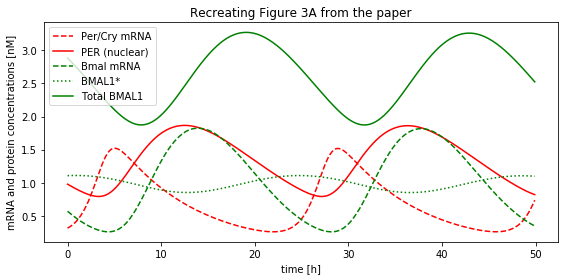

In [20]:
# Start code and write-up here.
#becker weimann model

import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

def bw_oscillator( t, statevars, params ):
    y1 = statevars[0];
    y2 = statevars[1];
    y3 = statevars[2];
    y4 = statevars[3];
    y5 = statevars[4];
    y6 = statevars[5];
    y7 = statevars[6];

    v1b = params[0] # maximal rate of Per2/Cry transcription
    k1b = params[1] # activation threshold for Per2/Cry transcription
    k1i = params[2] # inhibition constant of Per2/Cry transcription
    c = params[3] # concentration of constituative activator
    p = params[4] # Hill coefficient of inhibition of Per2/Cry transcription
    k1d = params[5] # degradation rate of Per2/Cry mRNA
    k2b = params[6] # complex formation rate of Per2/Cry mRNA
    q = params[7] # Number of PER2/CRY complex forming subunits
    k2d = params[8] # degradation rate of cytoplasmic PER2/CRY
    k2t = params[9] # nuclear import rate of teh PER2/CRY complex
    k3t = params[10] # nuclear export rate of teh PER2/CRY complex
    k3d = params[11] # degradation rate of nuclear PER2/CRY
    v4b = params[12] # maximal rate of Bmal1 transcription
    k4b = params[13] # activation threshold for Bmal1 transcription
    r = params[14] # Hill coefficient of activation of Bmal1 transcription
    k4d = params[15] # degradation rate of Bmal1 mRNA
    k5b = params[16] # translation rate of BMAL1
    k5d = params[17] # degradation rate of cytoplasmic BMAL1
    k5t = params[18] # nuclear import rate of BMAL1
    k6t = params[19] # nuclear export rate of BMAL1
    k6d = params[20] # degradation rate of nuclear BMAL1
    k6a = params[21] # activation rate of nuclear BMAL1
    k7a = params[22] # deactivation rate of nuclear BMAL1
    k7d = params[23] # degradataion rate of nuclear BMAL1
        
    dydt = np.zeros( (7,) )
    f1 = v1b * (y7 + c) / (k1b*(1+(y3/k1i)**p) + (y7+c))
    f2 = v4b* y3**r/(k4b**r+y3**r)

    dydt[0] = f1 - k1d*y1
    dydt[1] = k2b*y1**q - k2d*y2 - k2t*y2 + k3t*y3
    dydt[2] = k2t*y2 - k3t*y3 - k3d*y3
    dydt[3] = f2 - k4d* y4
    dydt[4] = k5b*y4 - k5d*y5 - k5t*y5 + k6t*y6
    dydt[5] = k5t*y5 - k6t*y6 - k6d*y6 + k7a*y7 - k6a*y6
    dydt[6] = k6a*y6 - k7a*y7 - k7d*y7

    return dydt

v1b = 9 # maximal rate of Per2/Cry transcription
k1b = 1 # activation threshold for Per2/Cry transcription
k1i = 0.56 # inhibition constant of Per2/Cry transcription
c = 0.01 # concentration of constituative activator
p = 8 # Hill coefficient of inhibition of Per2/Cry transcription
k1d = 0.12 # degradation rate of Per2/Cry mRNA
k2b = 0.3 # complex formation rate of Per2/Cry mRNA
q = 2 # Number of PER2/CRY complex forming subunits
k2d = 0.05 # degradation rate of cytoplasmic PER2/CRY
k2t = 0.24 # nuclear import rate of teh PER2/CRY complex
k3t = 0.02 # nuclear export rate of teh PER2/CRY complex
k3d = 0.12 # degradation rate of nuclear PER2/CRY
v4b = 3.6 # maximal rate of Bmal1 transcription
k4b = 2.16 # activation threshold for Bmal1 transcription
r = 3 # Hill coefficient of activation of Bmal1 transcription
k4d = 0.75 # degradation rate of Bmal1 mRNA
k5b = 0.24 # translation rate of BMAL1
k5d = 0.06 # degradation rate of cytoplasmic BMAL1
k5t = 0.45 # nuclear import rate of BMAL1
k6t = 0.06 # nuclear export rate of BMAL1
k6d = 0.12 # degradation rate of nuclear BMAL1
k6a = 0.09 # activation rate of nuclear BMAL1
k7a = 0.003 # deactivation rate of nuclear BMAL1
k7d = 0.09 # degradataion rate of nuclear BMAL1

params = (v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)

mf = lambda t,y : bw_oscillator(t,y, params)

sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), 
                                t_eval=np.arange(0,200,.1) )
sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,50), y0=sol1.y[:,-1], 
                                t_eval=np.arange(0,50,.1) )

plt.figure(figsize=(8,4))
#plt.figure()
# plt.subplot( 2, 1, 1)
# plt.plot( sol1.t, sol1.y.T )
# plt.xlabel( "Time (h)")
# plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 (n)',"BMAL1*"])
# plt.subplot( 2, 1, 2 )
plt.plot( sol2.t, sol2.y[0, :], "r--")
plt.plot( sol2.t, sol2.y[2, :], "r")
plt.plot( sol2.t, sol2.y[3, :], "g--")
plt.plot( sol2.t, sol2.y[6, :], "g:")
plt.plot( sol2.t, sol2.y[4, :] + sol2.y[5, :] + sol2.y[6, :], "g")
plt.title("Recreating Figure 3A from the paper")
plt.ylabel("mRNA and protein concentrations [nM]")
plt.xlabel("time [h]")
plt.legend( ['Per/Cry mRNA','PER (nuclear)','Bmal mRNA',"BMAL1*", "Total BMAL1"])
# plt.figure()
# plt.plot( sol2.t, sol2.y.T)
# plt.xlabel( "Time (h)")
# plt.legend( ['Per mRNA','PER (cyto)','PER (n)','Bmal mRNA','BMAL1 (cyto)','BMAL1 (n)',"BMAL1*"])

plt.tight_layout()

In [29]:
def runBWModel(solve_ivp_method):
    v1b = 9 # maximal rate of Per2/Cry transcription
    k1b = 1 # activation threshold for Per2/Cry transcription
    k1i = 0.56 # inhibition constant of Per2/Cry transcription
    c = 0.01 # concentration of constituative activator
    p = 8 # Hill coefficient of inhibition of Per2/Cry transcription
    k1d = 0.12 # degradation rate of Per2/Cry mRNA
    k2b = 0.3 # complex formation rate of Per2/Cry mRNA
    q = 2 # Number of PER2/CRY complex forming subunits
    k2d = 0.05 # degradation rate of cytoplasmic PER2/CRY
    k2t = 0.24 # nuclear import rate of teh PER2/CRY complex
    k3t = 0.02 # nuclear export rate of teh PER2/CRY complex
    k3d = 0.12 # degradation rate of nuclear PER2/CRY
    v4b = 3.6 # maximal rate of Bmal1 transcription
    k4b = 2.16 # activation threshold for Bmal1 transcription
    r = 3 # Hill coefficient of activation of Bmal1 transcription
    k4d = 0.75 # degradation rate of Bmal1 mRNA
    k5b = 0.24 # translation rate of BMAL1
    k5d = 0.06 # degradation rate of cytoplasmic BMAL1
    k5t = 0.45 # nuclear import rate of BMAL1
    k6t = 0.06 # nuclear export rate of BMAL1
    k6d = 0.12 # degradation rate of nuclear BMAL1
    k6a = 0.09 # activation rate of nuclear BMAL1
    k7a = 0.003 # deactivation rate of nuclear BMAL1
    k7d = 0.09 # degradataion rate of nuclear BMAL1

    params = (v1b,k1b,k1i,c,p,k1d,k2b,q,k2d,k2t,k3t,k3d,v4b,k4b,r,k4d,k5b,k5d,k5t,k6t,k6d,k6a,k7a,k7d)

    mf = lambda t,y : bw_oscillator(t,y, params)

    sol1 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,200), y0=0.1*np.ones((7,)), method=solve_ivp_method, rtol=1e-8 )
    sol2 = scipy.integrate.solve_ivp( fun=mf, t_span=(0,2400), y0=sol1.y[:,-1], method=solve_ivp_method, rtol=1e-8)
    return sol2

In [30]:
%%timeit
#using RK23
sol = runBWModel("RK23")

2.13 s ± 36.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
%%timeit
#using RK45
sol = runBWModel("RK23")

2.08 s ± 12.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [32]:
%%timeit
#using DOP853
sol = runBWModel("RK45")

685 ms ± 9.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%%timeit
#using Radau
sol = runBWModel("Radau")

4.68 s ± 60.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%%timeit
#using BDF
sol = runBWModel("BDF")

2.98 s ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
%%timeit
#using LSODA
sol = runBWModel("LSODA")

429 ms ± 3.77 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<hr style="border:2px solid gray"> </hr>

Acknowledgements

*Replace this text with links to external resources and thanks to people you worked with.*